<a href="https://colab.research.google.com/github/vicky-getova/FYP/blob/main/Pre_processing_and_Segmentation_Techniques_ALL_IDB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mounting my OneDrive to the notebook in order to load the dataset folder
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# %cd /content/drive/MyDrive/Colab Notebooks/FYP/

In [3]:
# Extracting the folder from OneDrive to a folder in a the notebook
!cp "/content/drive/MyDrive/Colab Notebooks/FYP/ALL_IDB_data.zip" "ALL_IDB.zip"

In [4]:
# Unzipping the dataset folder in a new folder
!unzip -uq "ALL_IDB.zip" -d "ALL_IDB"

In [5]:
from IPython.display import Image

In [6]:
# Loading an image from the ALL_IDB1 file using cv2.imread() funnction.
# Input parameters: 
#   path
#   flag = 1 (to load a color image)
import cv2
img_color = cv2.imread('/content/drive/MyDrive/Colab Notebooks/FYP/ALL_IDB/ALL_IDB2/ALL_IDB2/img/Im001_1.tif',1)


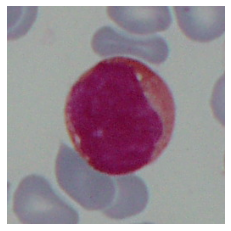

In [7]:
from matplotlib import pyplot as plt
plt.imshow(img_color)
plt.axis("off")
plt.show()

In [8]:
import os
!ls
os.getcwd()

ALL_IDB  ALL_IDB.zip  drive  sample_data


'/content'

In [9]:
from matplotlib import pyplot as plt
import cv2
items = os.listdir('/content/drive/MyDrive/Colab Notebooks/FYP/ALL_IDB/ALL_IDB2/ALL_IDB2/img')
print (items)

['Im026_1.tif', 'Im001_1.tif', 'Im020_1.tif', 'Im018_1.tif', 'Im008_1.tif', 'Im009_1.tif', 'Im025_1.tif', 'Im005_1.tif', 'Im007_1.tif', 'Im024_1.tif', 'Im021_1.tif', 'Im003_1.tif', 'Im013_1.tif', 'Im019_1.tif', 'Im010_1.tif', 'Im004_1.tif', 'Im011_1.tif', 'Im015_1.tif', 'Im022_1.tif', 'Im023_1.tif', 'Im014_1.tif', 'Im017_1.tif', 'Im006_1.tif', 'Im012_1.tif', 'Im016_1.tif', 'Im002_1.tif', 'Im082_1.tif', 'Im076_1.tif', 'Im057_1.tif', 'Im102_1.tif', 'Im042_1.tif', 'Im063_1.tif', 'Im099_1.tif', 'Im049_1.tif', 'Im074_1.tif', 'Im031_1.tif', 'Im094_1.tif', 'Im052_1.tif', 'Im095_1.tif', 'Im053_1.tif', 'Im089_1.tif', 'Im069_1.tif', 'Im032_1.tif', 'Im029_1.tif', 'Im067_1.tif', 'Im073_1.tif', 'Im079_1.tif', 'Im064_1.tif', 'Im055_1.tif', 'Im087_1.tif', 'Im086_1.tif', 'Im033_1.tif', 'Im109_1.tif', 'Im054_1.tif', 'Im091_1.tif', 'Im035_1.tif', 'Im066_1.tif', 'Im046_1.tif', 'Im050_1.tif', 'Im075_1.tif', 'Im097_1.tif', 'Im108_1.tif', 'Im036_1.tif', 'Im106_1.tif', 'Im101_1.tif', 'Im093_1.tif', 'Im034_1.

In [10]:
import re

ALL_images = []
for image in items:
        if re.search('[A-Za-z0-9]+_[1]+\.[A-Za-z0-9]+', image): 
                ALL_images.append(image)
print('Number of ALL cancer images:', len(ALL_images))

healthy_images = []
for image in items:
        if re.search('[A-Za-z0-9]+_[0]+\.[A-Za-z0-9]+', image): 
                healthy_images.append(image)
print('Number of healthy cell images:', len(healthy_images))

Number of ALL cancer images: 130
Number of healthy cell images: 130


In [11]:
ALL_list = []
for each_image in ALL_images:
  if each_image.endswith(".tif"):
    full_path = "/content/drive/MyDrive/Colab Notebooks/FYP/ALL_IDB/ALL_IDB2/ALL_IDB2/img/" + each_image
    image = cv2.imread(full_path, 1)
    im_resized = cv2.resize(image, (512, 512), interpolation=cv2.INTER_LINEAR)
    im_converted = cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB)
    ALL_list.append(im_converted)

print('Number of ALL cancer images:', len(ALL_list))

healthy_list = []
for each_image in healthy_images:
  if each_image.endswith(".tif"):
    full_path = "/content/drive/MyDrive/Colab Notebooks/FYP/ALL_IDB/ALL_IDB2/ALL_IDB2/img/" + each_image
    image = cv2.imread(full_path, 1)
    im_resized = cv2.resize(image, (512, 512), interpolation=cv2.INTER_LINEAR)
    im_converted = cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB)
    healthy_list.append(im_converted)

print('Number of healthy cell images:', len(healthy_list))

Number of ALL cancer images: 130
Number of healthy cell images: 130


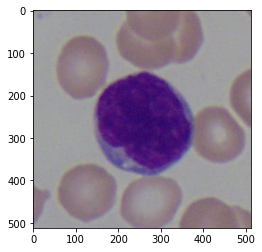

In [12]:
import matplotlib.pyplot as plt
def show_picture(image):
    plt.imshow(image)
    plt.show()

show_picture(ALL_list[0])

In [13]:
print(ALL_list[0].shape)
print(healthy_list[0].shape)

(512, 512, 3)
(512, 512, 3)


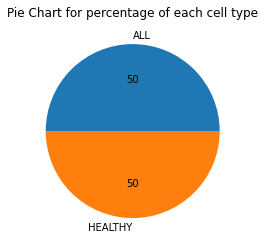

In [14]:
import pandas as pd
import numpy as np
cancer_dict = {"x_col":ALL_list, "y_col":[np.nan for x in range(len(ALL_list))]}
cancer_dict["y_col"] = "ALL"

normal_dict = {"x_col":healthy_list, "y_col":[np.nan for x in range(len(healthy_list))]}
normal_dict["y_col"] = "HEALTHY"


cancer_df = pd.DataFrame(cancer_dict)
normal_df = pd.DataFrame(normal_dict)

#train_df = cancer_df.append(normal_df, ignore_index=True)

plt.pie([len(ALL_list),len(healthy_list)],labels=["ALL","HEALTHY"],autopct='%.f')
plt.title('Pie Chart for percentage of each cell type')
plt.show()

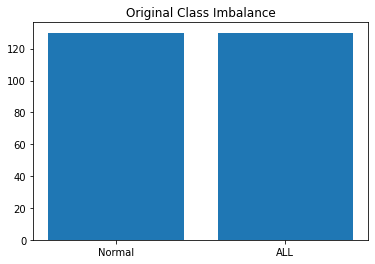

In [15]:
plt.bar(['Normal', 'ALL'], [len(healthy_list), len(ALL_list)])
plt.title('Original Class Imbalance')
plt.show()

Text(0.5, 1.0, 'HEM - Normal')

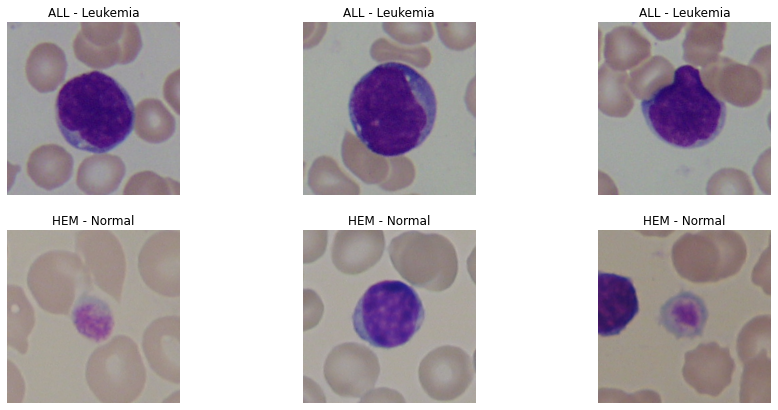

In [16]:
# Set figure
rows = 2
columns = 3
fig = plt.figure(figsize=(15, 7))

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# im1
plt.imshow(ALL_list[0])
plt.axis('off')
plt.title('ALL - Leukemia')

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# im2
plt.imshow(ALL_list[1])
plt.axis('off')
plt.title('ALL - Leukemia')

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# im3
plt.imshow(ALL_list[2])
plt.axis('off')
plt.title('ALL - Leukemia')

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)

# im4
plt.imshow(healthy_list[0])
plt.axis('off')
plt.title('HEM - Normal')

# Adds a subplot at the 5th position
fig.add_subplot(rows, columns, 5)

#im4
plt.imshow(healthy_list[1])
plt.axis('off')
plt.title('HEM - Normal')

# Adds a subplot at the 6th position
fig.add_subplot(rows, columns, 6)

#im6
plt.imshow(healthy_list[2])
plt.axis('off')
plt.title('HEM - Normal')

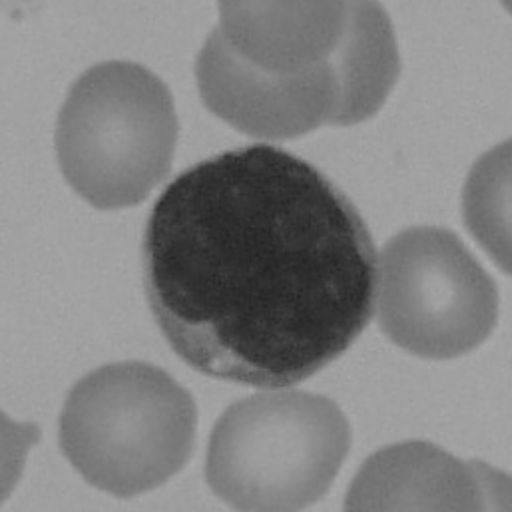

In [17]:
from google.colab.patches import cv2_imshow

# Convert RGB image to gray image
gray_img = cv2.cvtColor(ALL_list[0], cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

Text(0, 0.5, 'counts')

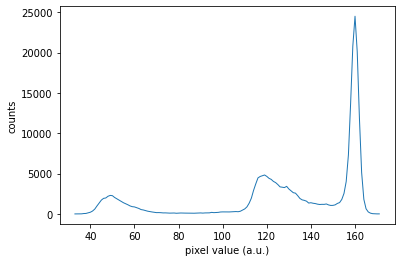

In [18]:
# Utilities for image processing
import skimage.io
import skimage.exposure
import skimage.measure
# Generate the histogram of the image. `skimage.exposure.histogram` will return
# the values of the histogram as well as the centers of the bins.
hist, bins = skimage.exposure.histogram(gray_img)

# Plot the histogram values versus the bin centers.
plt.plot(bins, hist, linewidth=1)
plt.xlabel('pixel value (a.u.)')
plt.ylabel('counts')

In [19]:
# Set total number of bins in the histogram
bins_num = 256
 
# Get the image histogram
hist, bin_edges = np.histogram(gray_img, bins=bins_num)
 
# Calculate centers of bins
bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.
 
# Iterate over all thresholds (indices) and get the probabilities w1(t), w2(t)
weight1 = np.cumsum(hist)
weight2 = np.cumsum(hist[::-1])[::-1]
 
# Get the class means mu0(t)
mean1 = np.cumsum(hist * bin_mids) / weight1
# Get the class means mu1(t)
mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]
 
inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
 
# Maximize the inter_class_variance function val
index_of_max_val = np.argmax(inter_class_variance)
 
threshold = bin_mids[:-1][index_of_max_val]
print("Otsu's algorithm implementation thresholding result: ", threshold)

Otsu's algorithm implementation thresholding result:  99.03515625


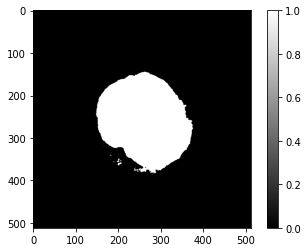

In [20]:
thresh_val = 99
thresh_im = gray_img < thresh_val

# Plot the image.
plt.imshow(thresh_im, cmap = 'gray')

# Add a colorbar
plt.colorbar()  

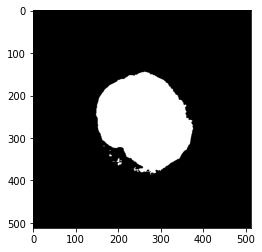

In [21]:
ret,thresh = cv2.threshold(gray_img, 99, 255, cv2.THRESH_BINARY_INV)
# Plot the image.
plt.imshow(thresh, cmap = 'gray')

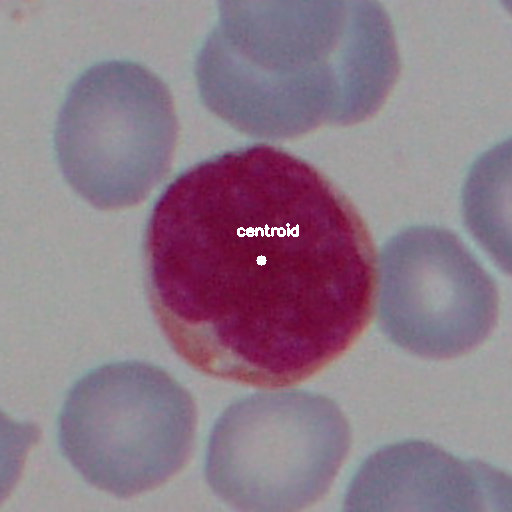

In [22]:
# calculate moments of binary image
M = cv2.moments(thresh)

# calculate x,y coordinate of center
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])

# put text and highlight the center
ALL = ALL_list[0].copy()
cv2.circle(ALL, (cX, cY), 5, (255, 255, 255), -1)
cv2.putText(ALL, "centroid", (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
 
# display the image
cv2_imshow(ALL)

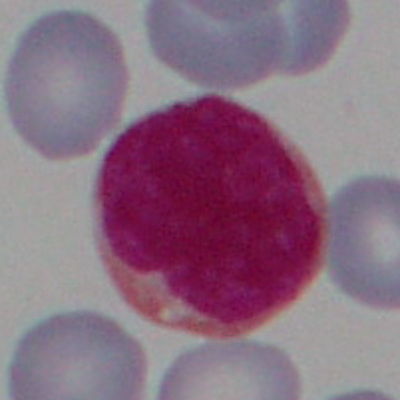

In [23]:
# [rows, columns]
cropped =  ALL_list[0][50:450, 50:450]  
  
cv2_imshow(cropped)

In [24]:
print('ALL rgb[0,0,:] => '+str(ALL_list[0][0,0,:]))
print('HEM rgb[0,0,:] => '+str(healthy_list[0][0,0,:]))

ALL rgb[0,0,:] => [156 144 164]
HEM rgb[0,0,:] => [167 160 154]


In [25]:
# Compute the lower and upper limits
lowerLimit = ALL_list[0][0][0][0] - 10, 100, 100
upperLimit = ALL_list[0][0][0][0] + 10, 255, 255

# display the lower and upper limits
print("Lower Limit:",lowerLimit)
print("Upper Limit", upperLimit)

Lower Limit: (146, 100, 100)
Upper Limit (166, 255, 255)


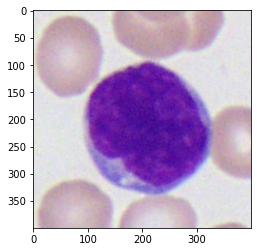

In [26]:
# Define the lower and upper percentiles
lower_p = np.percentile(cropped, 2)
upper_p = np.percentile(cropped, 98)

# Normalize the image between 0 and 255
img_normalized = cv2.normalize(cropped, None, 0, 255, cv2.NORM_MINMAX)

# Define the function to map each intensity level to output intensity level
def pixelVal(pix, lower_p, upper_p):
    if (0 <= pix and pix <= lower_p):
        return (0 / lower_p) * pix
    elif (lower_p < pix and pix <= upper_p):
        return ((255 - 0) / (upper_p - lower_p)) * (pix - lower_p) + 0
    else:
        return ((255 - 255) / (255 - upper_p)) * (pix - upper_p) + 255
  
# Vectorize the function to apply it to each value in the Numpy array
pixelVal_vec = np.vectorize(pixelVal)
  
# Split the image into separate color channels
b_channel,g_channel,r_channel = cv2.split(img_normalized)

# Apply contrast stretching to each color channel
b = pixelVal_vec(b_channel, lower_p, upper_p)
g = pixelVal_vec(g_channel, lower_p, upper_p)
r = pixelVal_vec(r_channel, lower_p, upper_p)

# Merge the color channels back into an RGB image
contrast_stretched = cv2.merge((b_channel, g_channel, r_channel))

plt.imshow(contrast_stretched)

In [27]:
# Print the minimum and maximum of red channel.
print('Minimum value for red channel:', np.min(r_channel)) 
print('Maximum value for red channel:', np.max(r_channel)) 

# Print the minimum and maximum of green channel.
print('Minimum value for green channel:', np.min(g_channel)) 
print('Maximum value for green channel:', np.max(g_channel)) 

# Print the minimum and maximum of blue channel.
print('Minimum value for blue channel:', np.min(b_channel))
print('Maximum value for blue channel:', np.max(b_channel)) 

Minimum value for red channel: 108
Maximum value for red channel: 255
Minimum value for green channel: 0
Maximum value for green channel: 242
Minimum value for blue channel: 50
Maximum value for blue channel: 246


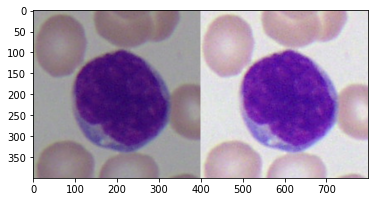

In [28]:
# Combine the original and contrast-stretched images
combined = np.hstack((cropped, contrast_stretched))

# Display the combined image
plt.imshow(combined)
plt.show()

In [29]:
r_channel,g_channel,b_channel = cv2.split(contrast_stretched)

# Print the minimum and maximum of lightness.
print('Minimum value for hue:', np.min(r_channel)) 
print('Maximum value for hue:', np.max(r_channel)) 

# Print the minimum and maximum of a.
print('Minimum value for saturation:', np.min(g_channel)) 
print('Maximum value for saturation:', np.max(g_channel)) 

# Print the minimum and maximum of b.
print('Minimum value for value:', np.min(b_channel))
print('Maximum value for value:', np.max(b_channel)) 

Minimum value for hue: 50
Maximum value for hue: 246
Minimum value for saturation: 0
Maximum value for saturation: 242
Minimum value for value: 108
Maximum value for value: 255


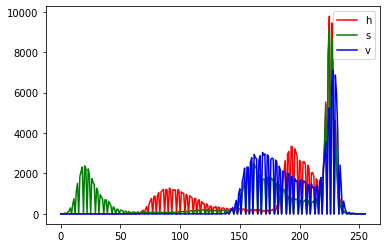

In [30]:
hist_h = cv2.calcHist([r_channel],[0],None,[256],[0,256])
hist_s = cv2.calcHist([g_channel],[0],None,[256],[0,256])
hist_v = cv2.calcHist([b_channel],[0],None,[256],[0,256])
plt.plot(hist_h, color='r', label="h")
plt.plot(hist_s, color='g', label="s")
plt.plot(hist_v, color='b', label="v")
plt.legend()
plt.show()

Text(0.5, 1.0, 'B-Channel Histogram')

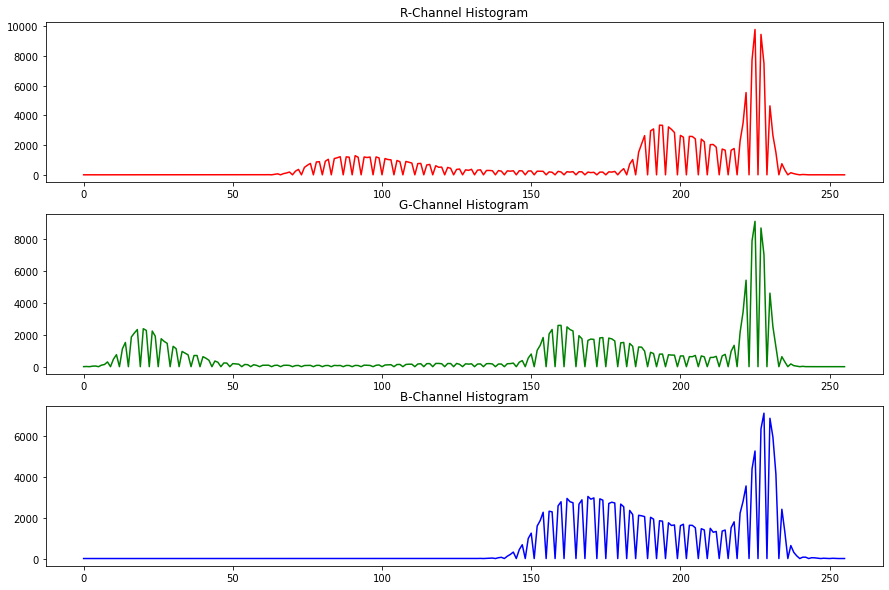

In [31]:
# Set up the axes for plotting.  
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
# This generates a single row of images with two columns and assigns them to 
# a variable `ax`.

# Plot the first image
ax[0].plot(hist_h, color='r')
ax[0].set_title('R-Channel Histogram')

ax[1].plot(hist_s, color='g')
ax[1].set_title('G-Channel Histogram')

ax[2].plot(hist_v, color='b')
ax[2].set_title('B-Channel Histogram')

Red Channel


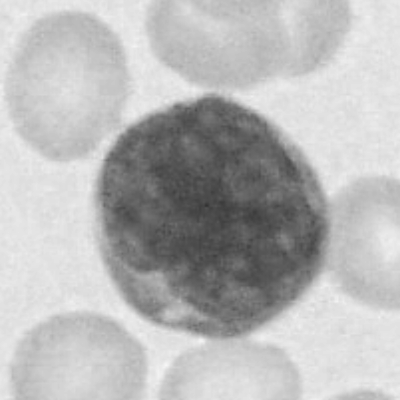

Green Channel


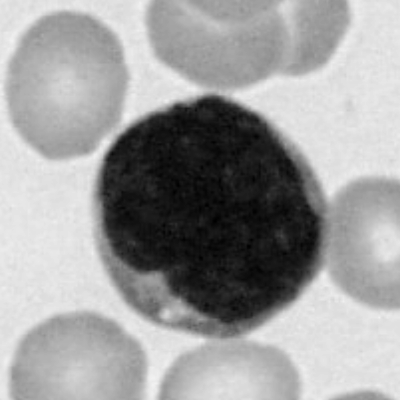

Blue Channel


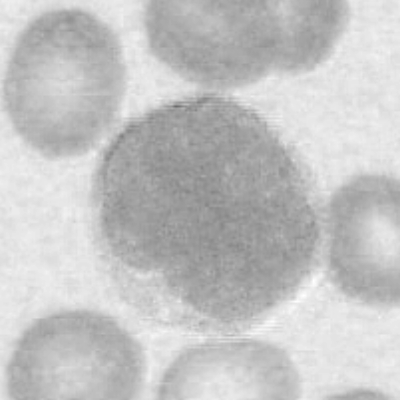

In [32]:
print('Red Channel')
cv2_imshow(r_channel)

print('Green Channel')
cv2_imshow(g_channel)

print('Blue Channel')
cv2_imshow(b_channel)

Text(0.5, 1.0, 'b_channel')

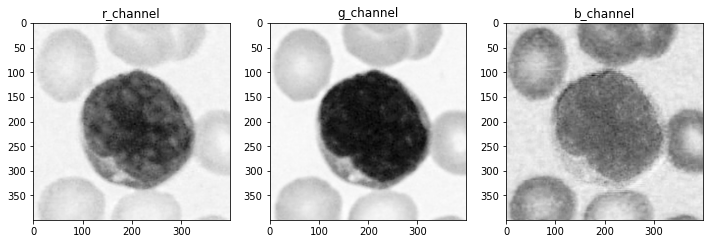

In [33]:
# Set the colormap for data display. 
gray = plt.cm.Greys_r

# Set up the axes for plotting.  
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 14))
# This generates a single row of images with two columns and assigns them to 
# a variable `ax`.

# Plot the lightness image
ax[0].imshow(r_channel, cmap = gray)
ax[0].set_title('r_channel')

# Plot the a image.
ax[1].imshow(g_channel, cmap = gray)
ax[1].set_title('g_channel')

# Plot the b image.
ax[2].imshow(b_channel, cmap = gray)
ax[2].set_title('b_channel')

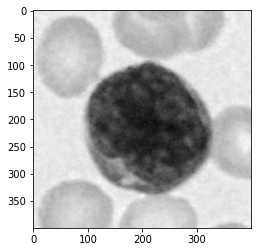

In [34]:
# apply gaussian filter for smoothing
blurG = cv2.GaussianBlur(r_channel,(3,3),0)
plt.imshow(blurG, cmap='gray')

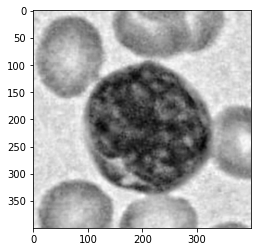

In [35]:
# create a CLAHE object for 
# Contrast Limited Adaptive Histogram Equalization (CLAHE) 
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize=(8, 8))
claheNorm = clahe.apply(blurG)
plt.imshow(claheNorm, cmap='gray')

Text(0, 0.5, 'counts')

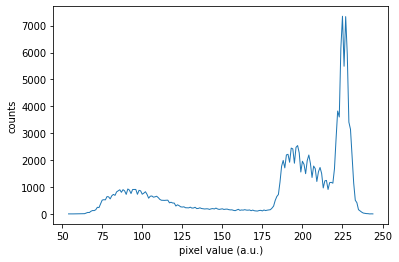

In [36]:
# Utilities for image processing
import skimage.io
import skimage.exposure
import skimage.measure
# Generate the histogram of the image. `skimage.exposure.histogram` will return
# the values of the histogram as well as the centers of the bins.
hist_cell, bins_cell = skimage.exposure.histogram(blurG)

# Plot the histogram values versus the bin centers.
plt.plot(bins_cell, hist_cell, linewidth=1)
plt.xlabel('pixel value (a.u.)')
plt.ylabel('counts')

In [37]:
# Set total number of bins in the histogram
bins_num = 256
 
# Get the image histogram
hist, bin_edges = np.histogram(blurG, bins=bins_num)
 
# Calculate centers of bins
bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.
 
# Iterate over all thresholds (indices) and get the probabilities w1(t), w2(t)
weight1 = np.cumsum(hist)
weight2 = np.cumsum(hist[::-1])[::-1]
 
# Get the class means mu0(t)
mean1 = np.cumsum(hist * bin_mids) / weight1
# Get the class means mu1(t)
mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]
 
inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
 
# Maximize the inter_class_variance function val
index_of_max_val = np.argmax(inter_class_variance)
 
threshold = bin_mids[:-1][index_of_max_val]
print("Otsu's algorithm implementation thresholding result: ", threshold)

Otsu's algorithm implementation thresholding result:  156.79296875


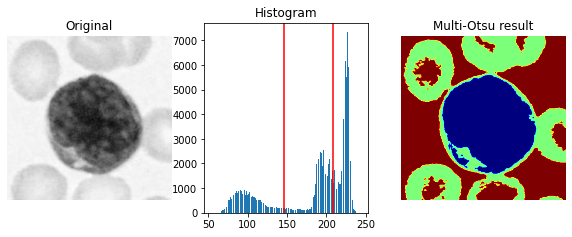

In [38]:
from skimage.filters import threshold_multiotsu
# Applying multi-Otsu threshold for the default value, generating
# three classes.

thresholds = threshold_multiotsu(blurG)

# Using the threshold values, we generate the three regions.
regions = np.digitize(blurG, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(blurG, cmap=gray)
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(blurG.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

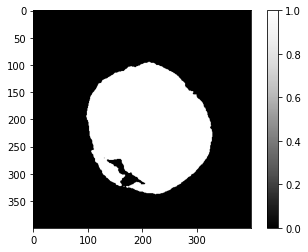

In [39]:
thresh_val = 158
thresh_im = blurG < thresh_val

# Plot the image.
plt.imshow(thresh_im, cmap = gray)

# Add a colorbar
plt.colorbar()  

In [40]:
otsu_threshold, image_otsu = cv2.threshold(blurG, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print("Obtained threshold: ", otsu_threshold)

Obtained threshold:  157.0


Text(0.5, 1.0, 'OTSU smoothed image')

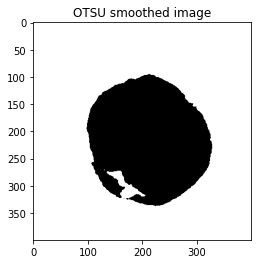

In [41]:
# plotting the OTSU smoothed image
plt.imshow(image_otsu, cmap=gray)
plt.title('OTSU smoothed image')

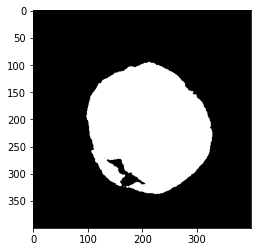

In [42]:
ret,thresh = cv2.threshold(blurG, 157, 255, cv2.THRESH_BINARY_INV)
# Plot the image.
plt.imshow(thresh, cmap = gray)

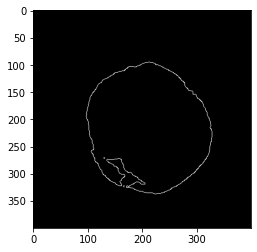

In [43]:
# Find Canny edges
edged_cleaned = cv2.Canny(thresh, 70, 150)
plt.imshow(edged_cleaned, cmap='gray')

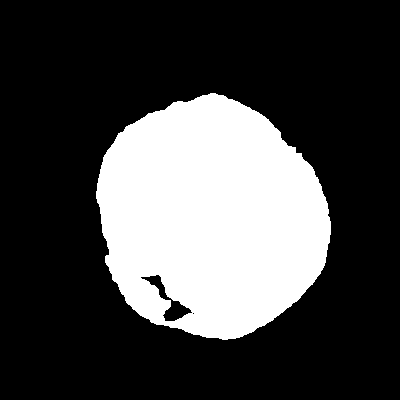

In [44]:
# Taking a matrix of size 5 as the kernel
kernel = np.ones((5, 5), np.uint8)

# The first parameter is the original image,
# kernel is the matrix with which image is
# convolved and third parameter is the number
# of iterations, which will determine how much
# you want to erode/dilate a given image.
img_dilation = cv2.dilate(thresh, kernel, iterations=1)

cv2_imshow(img_dilation)

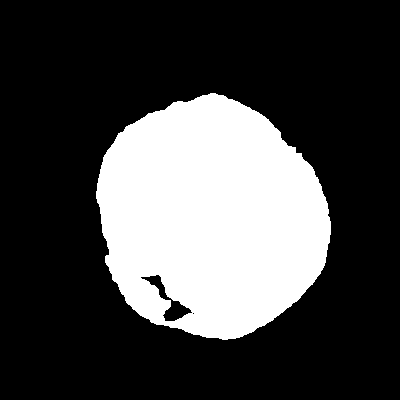

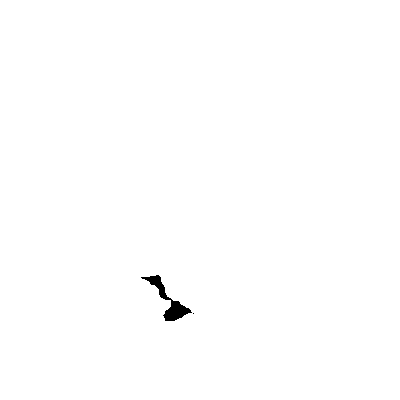

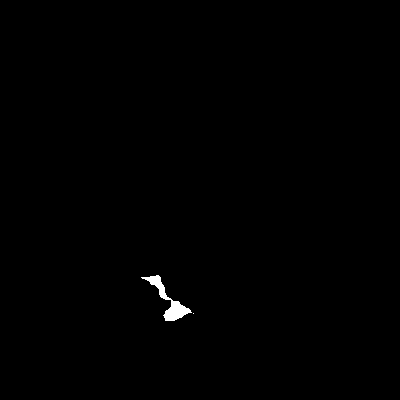

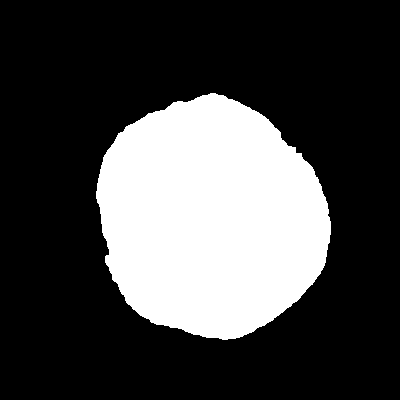

In [45]:
# Copy the thresholded image.
im_floodfill = img_dilation.copy()
 
# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = img_dilation.shape[:2]
mask_fill = np.zeros((h+2, w+2), np.uint8)
 
# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask_fill, (0,0), 255);
 
# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
 
# Combine the two images to get the foreground.
im_out = img_dilation | im_floodfill_inv
 
# Display images.
cv2_imshow(img_dilation)
cv2_imshow(im_floodfill)
cv2_imshow(im_floodfill_inv)
cv2_imshow(im_out)

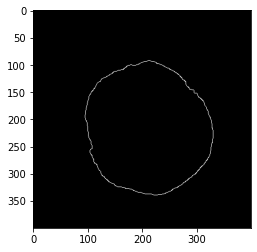

In [46]:
# Find Canny edges
edged_cleaned = cv2.Canny(im_out, 70, 200)
plt.imshow(edged_cleaned, cmap='gray')

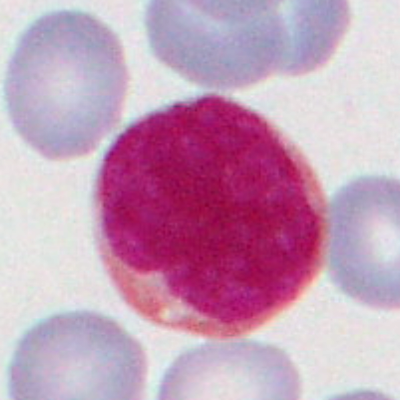

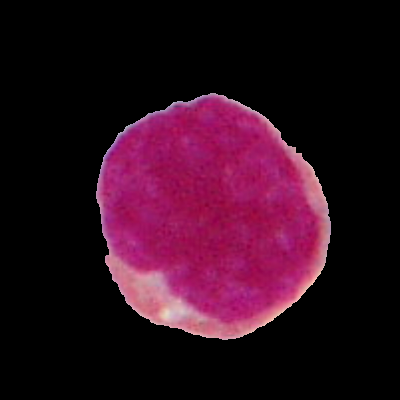

In [47]:
# Use the mask to remove the background from the original image
# mask_inv = cv2.bitwise_not(im_out)
# cv2_imshow(mask_inv)
result = cv2.bitwise_and(contrast_stretched, contrast_stretched, mask=im_out)

# Display the original and masked images
cv2_imshow(contrast_stretched)
cv2_imshow(result)

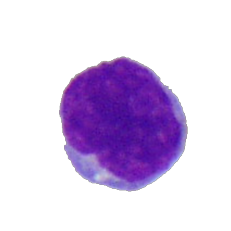

In [48]:
tmp = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
_,alpha = cv2.threshold(tmp,0,255,cv2.THRESH_BINARY)
b, g, r = cv2.split(result)
rgba = [b,g,r, alpha]
masked_tr = cv2.merge(rgba,4)

plt.axis('off')
plt.imshow(masked_tr)

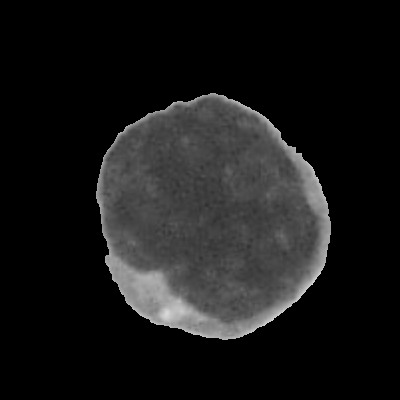

In [49]:
gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [50]:
# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
contours, hierarchy = cv2.findContours(gray.copy(), 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  
print("Number of Contours found = " + str(len(contours)))

Number of Contours found = 1


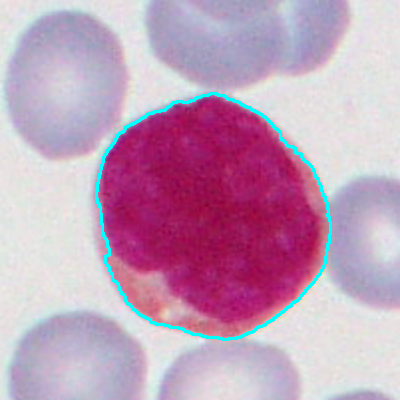

In [51]:
  # Draw all contours
# -1 signifies drawing all contours
original_img_copy = contrast_stretched.copy()
# print(opening_copy.shape)
cv2.drawContours(original_img_copy, contours, contourIdx = -1, color = (255, 255, 0), thickness = 2)
  
cv2_imshow(original_img_copy)

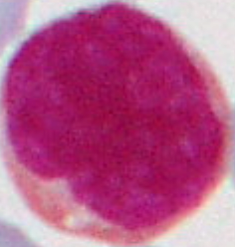

In [52]:
# Find the bounding box of the contours
x,y,w,h = cv2.boundingRect(contours[0])

# Crop the image using the bounding box coordinates
crop_img = contrast_stretched[y:y+h, x:x+w]

cv2_imshow(crop_img)

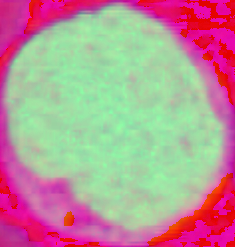

In [53]:
hsv_image = cv2.cvtColor(crop_img, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv_image)

In [54]:
h_channel,s_channel,v_channel = cv2.split(hsv_image)

# Print the minimum and maximum of lightness.
print('Minimum value for hue:', np.min(h_channel)) 
print('Maximum value for hue:', np.max(h_channel)) 

# Print the minimum and maximum of a.
print('Minimum value for saturation:', np.min(s_channel)) 
print('Maximum value for saturation:', np.max(s_channel)) 

# Print the minimum and maximum of b.
print('Minimum value for value:', np.min(v_channel))
print('Maximum value for value:', np.max(v_channel)) 

Minimum value for hue: 0
Maximum value for hue: 179
Minimum value for saturation: 0
Maximum value for saturation: 255
Minimum value for value: 110
Maximum value for value: 255


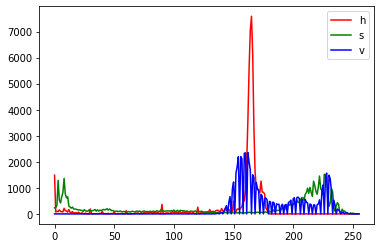

In [55]:
hist_h = cv2.calcHist([h_channel],[0],None,[256],[0,256])
hist_s = cv2.calcHist([s_channel],[0],None,[256],[0,256])
hist_v = cv2.calcHist([v_channel],[0],None,[256],[0,256])
plt.plot(hist_h, color='r', label="h")
plt.plot(hist_s, color='g', label="s")
plt.plot(hist_v, color='b', label="v")
plt.legend()
plt.show()

Text(0.5, 1.0, 'V-Channel Histogram')

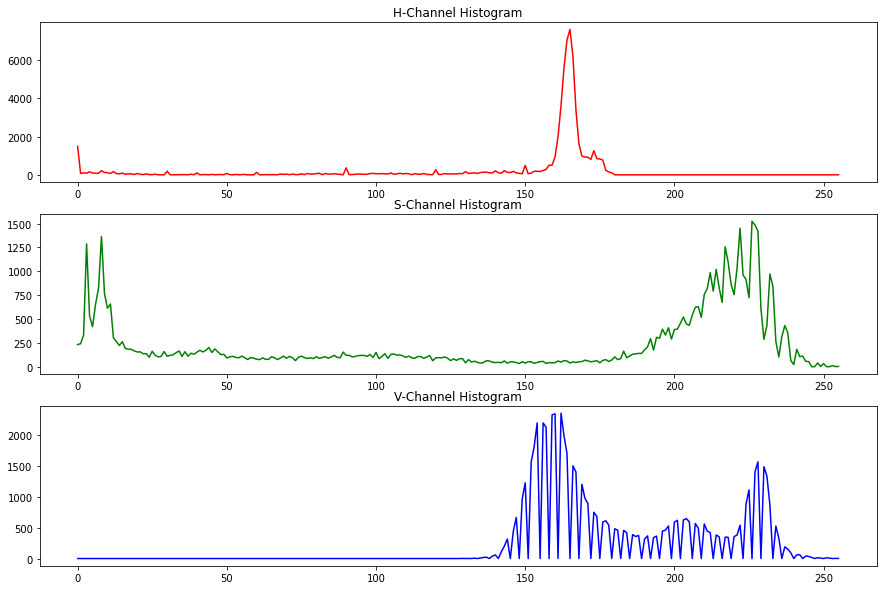

In [56]:
# Set up the axes for plotting.  
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
# This generates a single row of images with two columns and assigns them to 
# a variable `ax`.

# Plot the first image
ax[0].plot(hist_h, color='r')
ax[0].set_title('H-Channel Histogram')

ax[1].plot(hist_s, color='g')
ax[1].set_title('S-Channel Histogram')

ax[2].plot(hist_v, color='b')
ax[2].set_title('V-Channel Histogram')

Text(0.5, 1.0, 'v_channel')

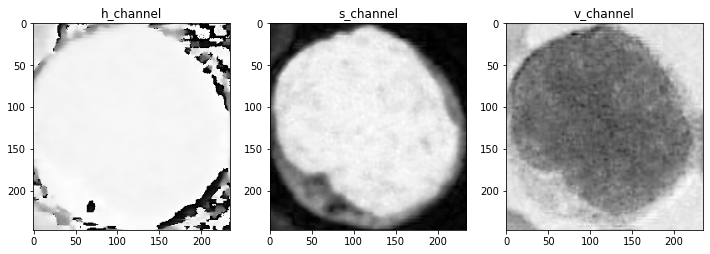

In [57]:
# Set the colormap for data display. 
gray = plt.cm.Greys_r

# Set up the axes for plotting.  
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 14))
# This generates a single row of images with two columns and assigns them to 
# a variable `ax`.

# Plot the lightness image
ax[0].imshow(h_channel, cmap = gray)
ax[0].set_title('h_channel')

# Plot the a image.
ax[1].imshow(s_channel, cmap = gray)
ax[1].set_title('s_channel')

# Plot the b image.
ax[2].imshow(v_channel, cmap = gray)
ax[2].set_title('v_channel')

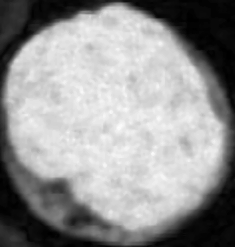

In [58]:
# apply median filter to b channel
blurM_cropped = cv2.medianBlur(s_channel, 3)
cv2_imshow(blurM_cropped)

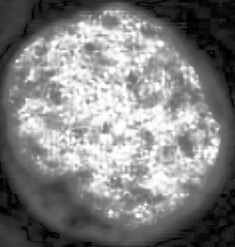

In [59]:
equ = cv2.equalizeHist(s_channel)
cv2_imshow(equ)

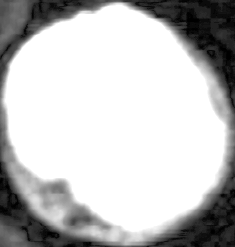

In [60]:
# Add the two images
enhanced = cv2.add(blurM_cropped, equ)

# Display the result
cv2_imshow(enhanced)

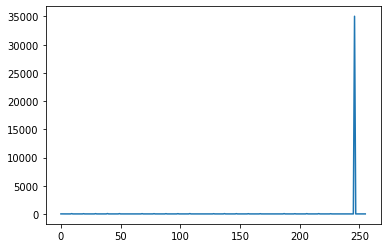

In [61]:
histogram = cv2.calcHist([enhanced], [0], None, [256], [230, 256])
plt.plot(histogram)
plt.show()

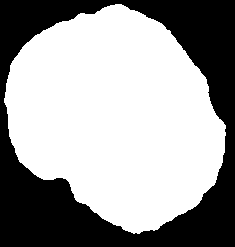

In [62]:
ret, binary_image = cv2.threshold(enhanced, 230, 255, cv2.THRESH_BINARY)
cv2_imshow(binary_image)

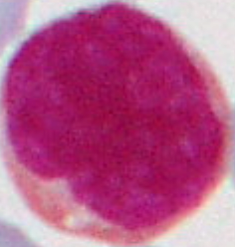

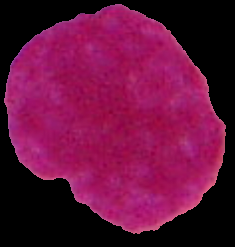

In [63]:
result_nuclei = cv2.bitwise_and(crop_img, crop_img, mask=binary_image)

# Display the original and masked images
cv2_imshow(crop_img)
cv2_imshow(result_nuclei)

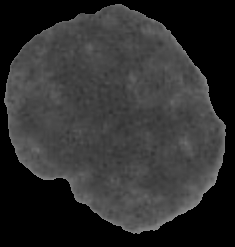

In [64]:
gray_nuclei = cv2.cvtColor(result_nuclei, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_nuclei)

In [65]:
# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
contours_nuclei, hierarchy_nuclei = cv2.findContours(gray_nuclei.copy(), 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

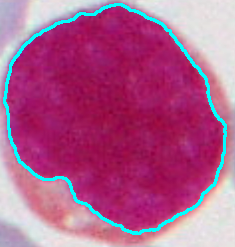

In [66]:
  # Draw all contours
# -1 signifies drawing all contours
s_channel_copy = crop_img.copy()
# print(opening_copy.shape)
cv2.drawContours(s_channel_copy, contours_nuclei, contourIdx = -1, color = (255, 255, 0), thickness = 2)
  
cv2_imshow(s_channel_copy)

In [67]:
# otsu_threshold_nuclei, image_otsu_nuclei = cv2.threshold(enhanced, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# print("Obtained threshold: ", otsu_threshold)

In [68]:
# # plotting the OTSU smoothed image
# plt.imshow(image_otsu_nuclei, cmap=gray)
# plt.title('OTSU smoothed image')

In [69]:
# thresh2 = cv2.adaptiveThreshold(enhanced, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
#                                           cv2.THRESH_BINARY, 7, 4)

# plt.imshow(thresh2, cmap=gray)

In [70]:
# kernel = np.ones((3,3), np.uint8)
# opening = cv2.morphologyEx(image_otsu_nuclei, cv2.MORPH_OPEN, kernel, iterations=2)
# plt.imshow(opening, cmap=gray)

In [71]:
# nuclei = cv2.cvtColor(result_nuclei, cv2.COLOR_BGR2GRAY)
# cv2_imshow(nuclei)

In [72]:
# # Calculate the histogram for a grayscale image
# hist = cv2.calcHist([crop_img],[0],None,[256],[0,256])

# # Plot the histogram
# plt.hist(crop_img.ravel(),256,[0,256], color='gray')
# plt.title('Grayscale Image Histogram')
# plt.xlabel('Intensity Value')
# plt.ylabel('Pixel Count')
# plt.show()

In [73]:
# thresh_val_manual = 120
# thresh_crop = crop_img < thresh_val_manual

# # Plot the image.
# plt.imshow(thresh_crop, cmap = 'gray')

# # Add a colorbar
# plt.colorbar()  

In [74]:
# ret_nucl,thresh_nucl = cv2.threshold(crop_img, 120, 255, cv2.THRESH_BINARY_INV)
# # Plot the image.
# plt.imshow(thresh_nucl, cmap = 'gray')

In [75]:
# # Convert the image to a one-dimensional array
# img_flat = np.reshape(enhanced, (-1, 1))
# img_flat = np.float32(img_flat)
# print(img_flat.shape)
# plt.hist(img_flat,256,[0,256])
# plt.show()

In [76]:
# # Apply k-means clustering to determine the threshold value
# num_clusters = 2
# criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# flags = cv2.KMEANS_RANDOM_CENTERS
# compactness, labels, centers = cv2.kmeans(img_flat, num_clusters, None, criteria, 10, flags)

In [77]:
# A = img_flat[labels==0]
# B = img_flat[labels==1]

# # Now plot 'A' in red, 'B' in blue, 'centers' in yellow
# plt.hist(A,256,[0,256],color = 'r')
# plt.hist(B,256,[0,256],color = 'b')
# plt.show()

In [78]:
# # Apply the threshold to the image using the threshold value obtained from the clustering algorithm
# threshold_value = int(centers[1][0]) # Use the center of the second cluster as the threshold value
# max_value = 255
# threshold_type = cv2.THRESH_BINARY
# ret_kmeans, thresh_img_kmeans = cv2.threshold(crop_img, threshold_value, max_value, threshold_type)

# # Display the thresholded image
# cv2_imshow(thresh_img_kmeans)